In [1]:
date()

[1] "Sun Oct 02 16:06:25 2016"

In [2]:
sapply(c("pipeR", "ggplot2", "dplyr", "tidyr", "readr"), require, character.only = TRUE)

Loading required package: pipeR
Loading required package: ggplot2
Loading required package: dplyr
Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Warning message:
: package 'tidyr' was built under R version 3.3.1Loading required package: readr
Warning message:
: package 'readr' was built under R version 3.3.1

pipeR ggplot2   dplyr   tidyr   readr 
   TRUE    TRUE    TRUE    TRUE    TRUE

# 2章
## 種子数の統計モデリング

例題

* 調査対象種の植物の複数個体から種子を採取
* 個体$i$から$y_i$個の種子を採取
* $y_i$はどのような確率分布に従うか

例題データ読み込み（http://hosho.ees.hokudai.ac.jp/%7Ekubo/stat/iwanamibook/fig/distribution/data.RData）

In [3]:
dir(".", full.names = TRUE) %>>% cat(sep = "\n")

./Chap01.md
./Chap02.html
./Chap02.ipynb
./Chap02.r
./Chap03.ipynb
./chap11.html
./chap11.ipynb
./chap11.r
./data
./docs
./README.md
./runbugs.R
./Y.RData


In [4]:
dir("./data", full.names = TRUE, recursive = TRUE) %>>% cat(sep = "\n")

./data/chap02/data.RData
./data/chap03/data3a.csv


In [5]:
ls.str()

In [6]:
load("data/chap02/data.RData")

In [7]:
ls.str()

data :  num [1:50] 2 2 4 6 4 5 2 3 1 2 ...

データはすべて非負の整数

In [8]:
data

[1] 2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7
[39] 2 2 6 2 4 5 4 5 1 3 2 3

個数は50（50個体分のデータ）

In [9]:
length(data)

[1] 50

標本平均は3.56

In [10]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

度数分布

In [11]:
table(data)

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

ヒストグラムを描く

* ひと山の分布

In [12]:
options(repr.plot.width = 4, repr.plot.height = 4)

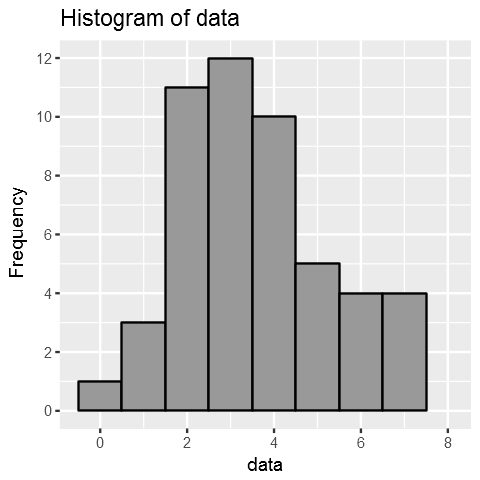

In [13]:
data_frame(data = data) %>>% 
    ggplot(aes(x = data)) + 
        geom_histogram(binwidth = 1, colour = "black", fill = gray(0.6)) + 
        scale_y_continuous(breaks = seq(0, 12, 2)) + 
        scale_x_continuous(breaks = seq(0, 8, 2), limits = c(-0.5, 8.1)) + 
        labs(title = "Histogram of data") + 
        ylab("Frequency")

標本分散

In [14]:
var(data)

[1] 2.986122

標本標準偏差

In [15]:
sd(data)

[1] 1.72804

In [16]:
var(data) %>>% sqrt

[1] 1.72804

## 2.2 データと確率分布の対応関係をながめる

* 確率分布: 確率変数の値とそれが出現する確率を対応させたもの
    * 確率変数: ある植物個体 $i$ の種子数 $y_i$
    * 個体$i$の種子数が$y_i$になる確率はポアソン分布に従う，と考える
* ポアソン分布]
    * [ポアソン分布 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83)
    * パラメータ: 分布の平均

平均 3.56 のポアソン分布は，

In [17]:
y <- 0:9
prob <- dpois(y, lambda = 3.56)

* 種子数が0になる確率は，0.028，1になる確率は0.10
* 一番確立が高いのは種子数が3になる場合で，0.21

In [18]:
cbind(y, prob)

y,prob
0,0.02843882
1,0.10124222
2,0.18021114
3,0.21385056
4,0.19032700
5,0.13551282
6,0.08040427
7,0.04089132
8,0.01819664
9,0.00719778


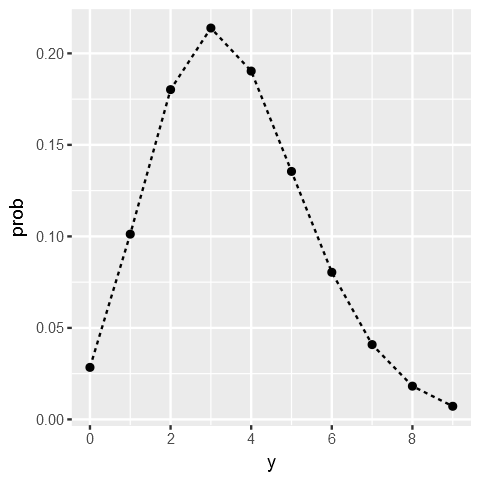

In [19]:
data_frame(y, prob) %>>% 
    ggplot(aes(y, prob)) + 
    geom_line(linetype = 2) +
    geom_point() + 
    scale_x_continuous(breaks = seq(0, 8, 2))

観測データのヒストグラムと確率分布を重ねる（確率分布 $\times$ 個体数）

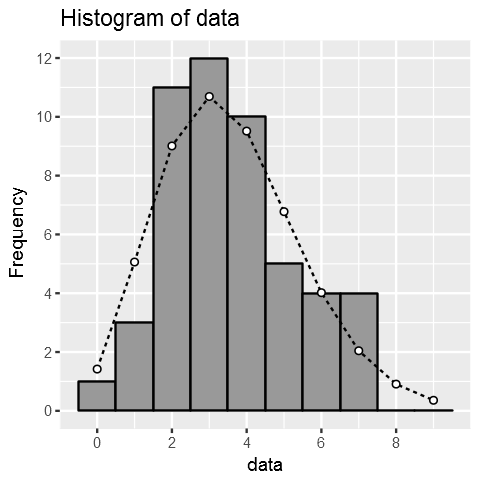

In [20]:
ggplot() + 
    geom_histogram(data = data_frame(x = data), aes(x = x), 
                   colour = "black", fill = gray(0.6), binwidth = 1) + 
    geom_line(data = data_frame(y, prob = prob * 50), aes(x = y, y = prob), linetype = 2) + 
    geom_point(data = data_frame(y, prob = prob * 50), aes(x = y, y = prob), 
               shape = 21, fill = "white") + 
    labs(title = "Histogram of data") + 
    ylab("Frequency") + 
    xlab("data") + 
    scale_x_continuous(breaks = seq(0, 8, 2)) + 
    scale_y_continuous(breaks = seq(0, 12, 2))

## 2.3 ポアソン分布とは何か?

定義は，

$$p(y | \lambda) = \frac{\lambda^y \exp(-\lambda)}{y!} $$

性質は，

* $\sum\limits^{\infty}_{y = 0}p(y | \lambda) = 1$
* 平均は $\lambda$
* 分散と平均は等しい

種子数のデータを表現するのにポアソン分布を選んだのは，

* 値が非負の整数
* $y_i$ に下限（0）はあるが上限はわからない
* 平均（3.56）と分散（2.99）がだいたい等しい

パラメータ $\lambda$ を変化させると，

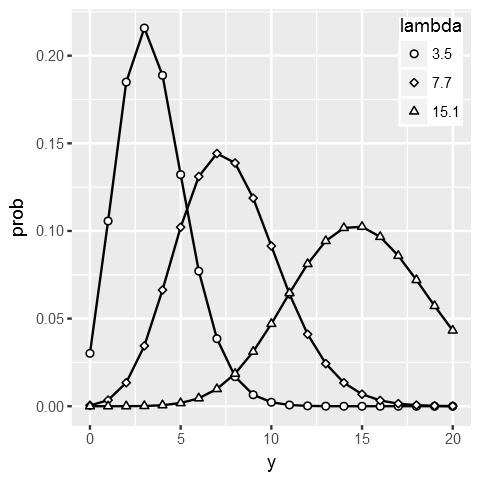

In [21]:
data_frame(x = c(0:20), y1 = dpois(x, lambda = 3.5), y2 = dpois(x, lambda = 7.7), 
           y3 = dpois(x, lambda = 15.1)) %>>%
    gather(lambda, val, -x) %>>%
    ggplot(aes(x = x, y = val, shape = lambda)) + 
    geom_line() + 
    geom_point(fill = "white") + 
    ylab("prob") + 
    xlab("y") + 
    scale_shape_manual(values = c(21, 23, 24), labels = c("3.5", "7.7", "15.1")) + 
    theme(legend.position=c(.9, .85))

## 2.4 ポアソン分布のパラメータの最尤推定

* 最尤推定
    * 尤度（当てはまりの良さ）を最大にするパラメータ（ここでは$\lambda$）の値を探す
    * 尤度（$L(\lambda)$）はある$\lambda$ における $p(y_i | \lambda)$ の積 （同時確率）
    
$$ 
\begin{align}
L(\lambda) &= \prod\limits_{i}p(y_i | \lambda) \\
    &= \prod\limits_{i}\frac{\lambda^{y_i} \exp(-\lambda)}{y_i!}
\end{align}
$$

* 実際には対数尤度関数を使う

$$
\log L(y_i) = \sum\limits_{i}\left( y_i \log\lambda - \lambda - \sum\limits^{y_i}_{k}\log k \right)
$$

$y_i$，$y_2$，$y_3$についてなら，尤度は，

In [22]:
data[1:3]

[1] 2 2 4

In [23]:
dpois(data[1:3], lambda = 3.56)

[1] 0.1802111 0.1802111 0.1903270

In [24]:
dpois(data[1:3], lambda = 3.56) %>>% prod()

[1] 0.00618107

平均 $\lambda$ を変化させたときにポアソン分布の形状と対数尤度がどのように変化するか

対数尤度にして計算

In [25]:
logL <- function(m){
    dpois(data, m, log = TRUE) %>>% sum
}

In [26]:
gpPois <- function(lambda){
    gp <- ggplot() + 
    geom_histogram(data = data_frame(x = data), aes(x = x), 
                   colour = "black", fill = gray(0.6), binwidth = 1) + 
    geom_line(data = data_frame(y, prob = dpois(y, lambda = lambda) * 50), aes(x = y, y = prob), 
              linetype = 2) + 
    geom_point(data = data_frame(y, prob = dpois(y, lambda = lambda) * 50), aes(x = y, y = prob), 
               shape = 21, fill = "white") + 
    scale_x_continuous(breaks = seq(0, 8, 2)) + 
    scale_y_continuous(breaks = seq(0, 15, 5), limits = c(0, 15)) + 
    annotate(x = 6, y = 13, hjust = 0, vjust = 0, geom = "text", size = 3, 
             label = sprintf("lambda=%.1f\nlog L=%.1f", lambda, logL(lambda))) + 
    theme(axis.title = element_blank())
    return(gp)
}

In [27]:
gps <- seq(2.0, 5.2, 0.4) %>>% lapply(gpPois)

In [28]:
library(gridExtra)

Warning message:
: package 'gridExtra' was built under R version 3.3.1
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [29]:
options(repr.plot.width = 8, repr.plot.height = 8)

$\lambda = 3.6$ のとき $\log L = -97.3$ で最大

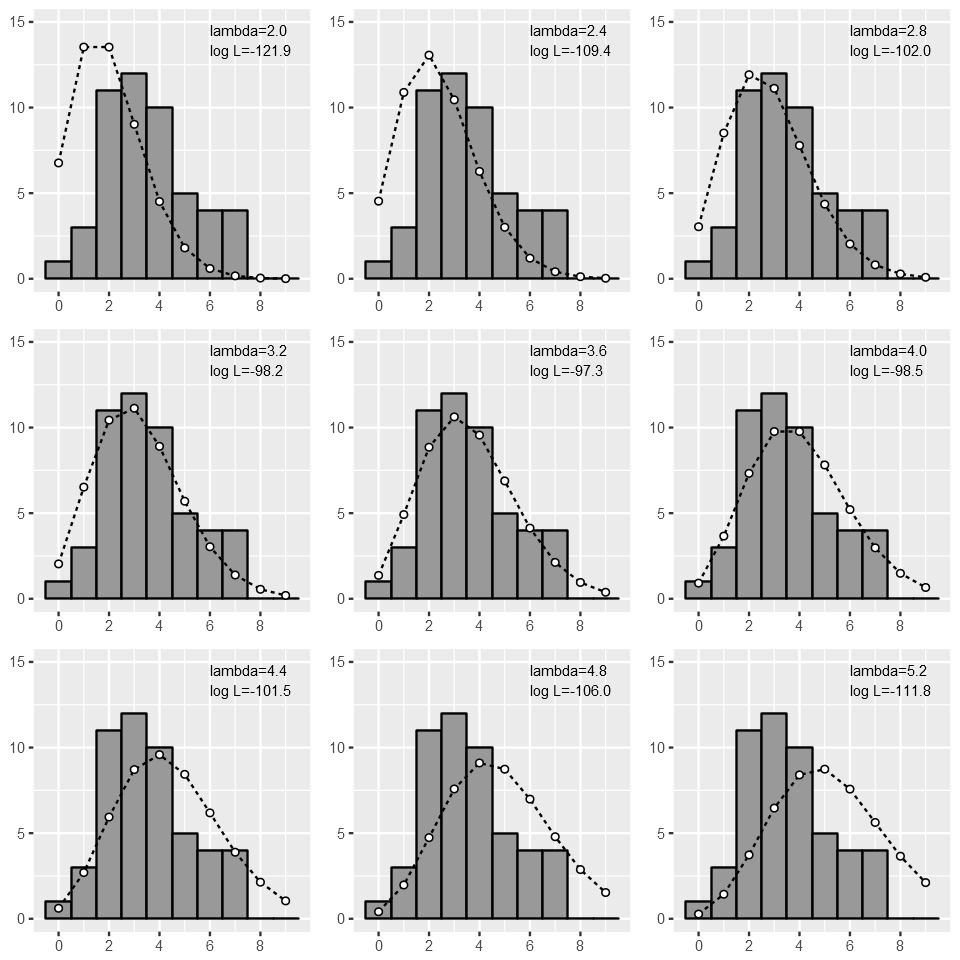

In [30]:
do.call(grid.arrange, c(gps, ncol = 3))

対数尤度と$\lambda$の関係

* 3.5ぐらいで最大

In [31]:
options(repr.plot.width = 4, repr.plot.height = 4)

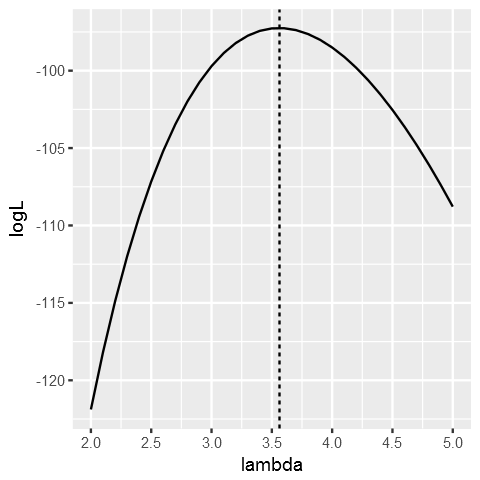

In [32]:
lambda = seq(2, 5, 0.1)
data_frame(lambda, logL = sapply(lambda, logL)) %>>% 
    ggplot(aes(x = lambda, y = logL)) + 
        geom_line() + 
        geom_vline(xintercept = 3.56, linetype = 2) + 
        scale_x_continuous(breaks = seq(2, 5, 0.5))

対数尤度が最大となる$\lambda$ を $\hat\lambda$ とする．
対数尤度関数が最大値で傾きゼロとなるとなる$\lambda$を探せばよい

$$
\begin{align}
\frac{\partial \log L(\lambda)}{\partial \lambda} &= \sum\limits_{i}\left\{ \frac{y_i}{\lambda} - 1 \right\} \\
    &= \frac{1}{\lambda}\sum\limits_{i}y_i - 50
\end{align}
$$

これが 0になるときの $\lambda$ が $\hat\lambda$ なので，解くと，
$$
\hat\lambda = \frac{1}{50}\sum\limits_{i}y_i
$$
これは標本平均のことなので $\hat\lambda = 3.56$
となる

* $\hat\lambda$: 最尤推定量
* $\hat\lambda = 3.56$: 最尤推定値


一般化すると，パラメータ$\theta$の確率分布から観測データ$y_i$が発生した時の確率を$p(y_i | \theta)$とすると尤度と対数尤度は，

$$ L(\theta | \boldsymbol{Y}) = \prod\limits_i p(y_i | \theta) $$

$$ \log L(\theta | \boldsymbol{Y}) = \sum\limits_i \log p(y_i | \theta) $$

となり，最尤推定で尤度（対数尤度）最大の$\hat{\theta}$を探す

### 2.4.1 疑似乱数と最尤推定値のばらつき

推定値の標準誤差を見積もる

* $\lambda = 3.5$ のポアソン分布に従うデータを50個生成して尤度を計算
* 3000回繰り返す．

Warning message:
: Removed 1 rows containing non-finite values (stat_bin).

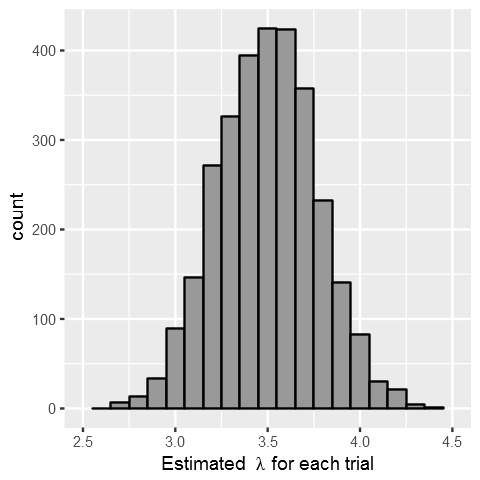

In [33]:
data_frame(y = sapply(c(1:3000), function(x){
    rpois(50, lambda = 3.5) %>>% mean
})) %>>% ggplot(aes(x = y)) + 
    geom_histogram(colour = "black", fill = gray(0.6), binwidth = 0.1) + 
    scale_x_continuous(limits = c(2.5, 4.5), breaks = seq(2.5, 4.5, 0.5)) + 
    xlab(expression("Estimated "~lambda~"for each trial"))

調査個体数が多ければ標準誤差は小さくなる

* 500個体

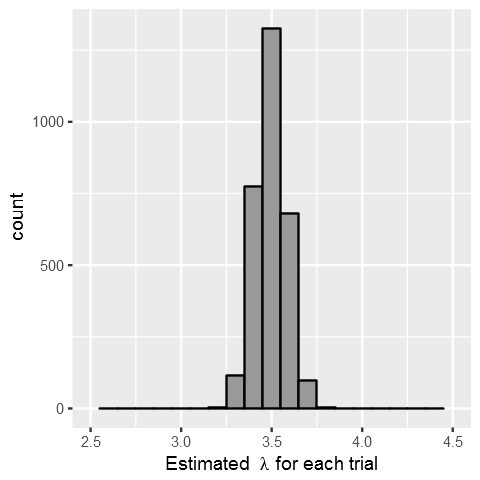

In [34]:
data_frame(y = sapply(c(1:3000), function(x){
    rpois(500, lambda = 3.5) %>>% mean
})) %>>% ggplot(aes(x = y)) + 
    geom_histogram(colour = "black", fill = gray(0.6), binwidth = 0.1) + 
    scale_x_continuous(limits = c(2.5, 4.5), breaks = seq(2.5, 4.5, 0.5)) + 
    xlab(expression("Estimated "~lambda~"for each trial"))

## 2.5 統計モデルの要点: 乱数発生・推定・予測

* 観測データの裏には「真の統計モデル」がある
* 「真の統計モデル」はあるパラメータに従う確率分布
* その確率分布から生成された乱数を観測個数サンプリングしたものが観測データ
* パラメータを推定する or モデルをデータに当てはめる
* 推定した統計モデルを使って未知データを予測する

## 2.6 確率分布の選び方

* 離散 or 連続
* 範囲
* 標本分散と標本平均の関係

出てくる確率分布

* ポアソン分布
* 二項分布
* 正規分布
* ガンマ分布
* 一様分布

## 2.7 まとめ

* 確率分布で考える
* データへのモデルの当てはまりは尤度で評価できる
* 最尤推定: 尤度最大となるパラメータを推定すること
* 推定結果を用いた未知データへのあてはめ: 予測
* 確率分布を混合することで複雑なばらつきを表現できる

In [35]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.0 (2016-05-03)
 system   x86_64, mingw32             
 ui       RTerm                       
 language (EN)                        
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-10-02                  

 package    * version    date       source                             
 assertthat   0.1        2013-12-06 CRAN (R 3.3.0)                     
 Cairo        1.5-9      2015-09-26 CRAN (R 3.3.0)                     
 colorspace   1.2-6      2015-03-11 CRAN (R 3.3.0)                     
 crayon       1.3.2      2016-06-28 CRAN (R 3.3.1)                     
 DBI          0.5        2016-08-11 CRAN (R 3.3.1)                     
 devtools     1.12.0     2016-06-24 CRAN (R 3.3.1)                     
 digest       0.6.10     2016-08-02 CRAN (R 3.3.1)                     
 dplyr      * 0.5.0      2016-06-24 CRAN (R 3.3.1)                     
 evaluate     0.9        2016-04-29 CRA